In [1]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

warnings.filterwarnings("ignore", category=DeprecationWarning)


warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
#!pip install scorecardpy

In [7]:
# Importing relevant libraries
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [8]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
df_bs = pd.read_csv('/content/drive/MyDrive/bikesharing/hour.csv')

In [10]:
# Printing first few records
df_bs.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Shape of the Dataset
df_bs.shape

(17379, 17)

In [12]:
# Renaming the Data

df_bs.rename(columns={'instant':'id',
                        'dteday':'datetime',
                        'holiday':'holiday_ind',
                        'workingday':'workingday_ind',
                        'weathersit':'weather_con',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)


In [13]:
df_bs.head()

df_bs.dtypes

,0
id,int64
datetime,object
season,int64
year,int64
month,int64
hour,int64
holiday_ind,int64
weekday,int64
workingday_ind,int64
weather_con,int64


In [14]:
# Check for Missing observations
(df_bs.isnull().sum() / len(df_bs)).sort_values(ascending=False)


,0
id,0.0
weather_con,0.0
registered,0.0
casual,0.0
windspeed,0.0
humidity,0.0
atemp,0.0
temp,0.0
workingday_ind,0.0
datetime,0.0


<ipython-input-16-8b16f5f22d66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bs['total_count'] , fit=norm);


mu = 189.46 and sigma = 181.38


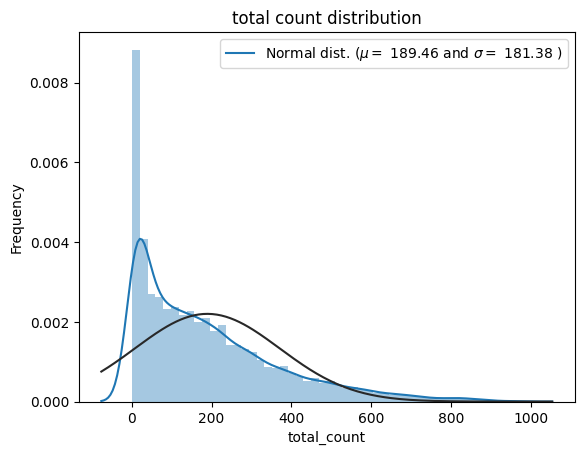

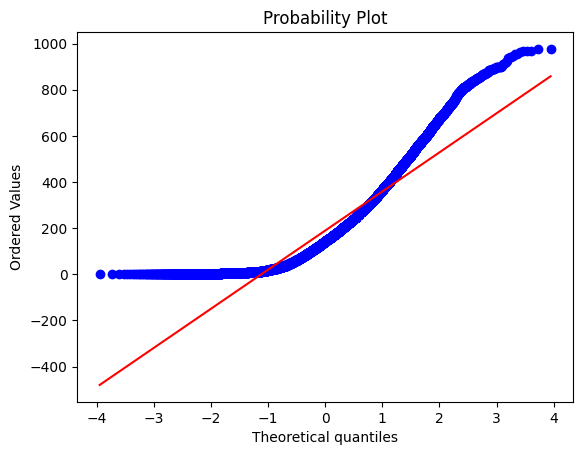

In [16]:
# Test - distribution of dep var
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df_bs['total_count'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_bs['total_count'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total count distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_bs['total_count'], plot=plt)
plt.show()

In [17]:
df_bs['datetime'] = pd.to_datetime (df_bs.datetime) # categorical variables
df_bs['season'] = df_bs.season.astype ('category')
df_bs['holiday_ind'] = df_bs.holiday_ind.astype('category')
df_bs['weekday'] = df_bs.weekday.astype('category')
df_bs['weather_con'] = df_bs.weather_con.astype('category')
df_bs['workingday_ind'] = df_bs.workingday_ind.astype('category')
df_bs['month']=df_bs.month.astype('category')
df_bs['holiday_ind'] = df_bs.holiday_ind.astype("category")
df_bs['weekday'] =df_bs.weekday.astype('category')
df_bs['weather_con'] = df_bs.weather_con.astype('category')
df_bs['workingday_ind'] = df_bs.workingday_ind.astype( 'category')
df_bs['month'] = df_bs.month.astype('category')
df_bs['year'] = df_bs. year.astype('category')
df_bs['hour'] = df_bs.hour.astype('category')

Text(0, 0.5, 'Freq')

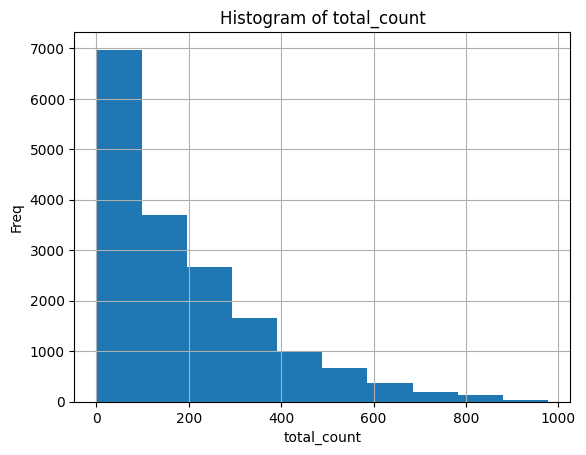

In [18]:
# An alternative View
df_bs.total_count.hist()
plt.title('Histogram of total_count')
plt.xlabel('total_count')
plt.ylabel('Freq')

<ipython-input-19-430224a6853e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df_bs['total_count']) , fit=norm);


mu = 4.57 and sigma = 1.42


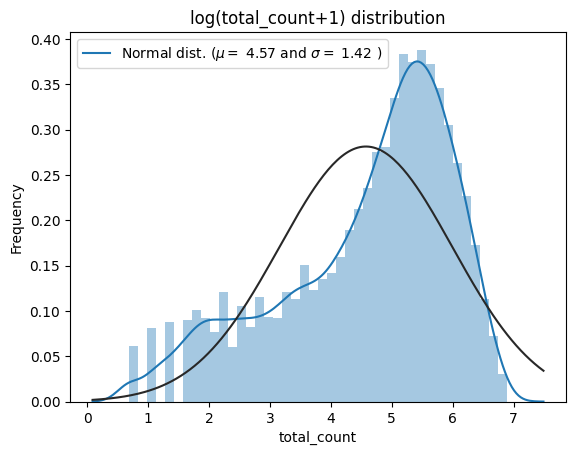

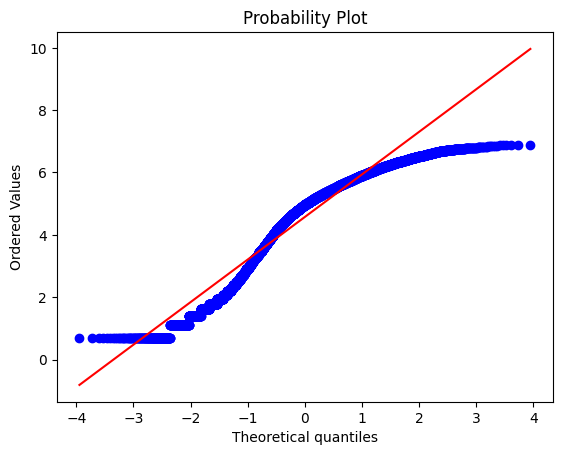

In [19]:
# Log-transformation of the Dep Variable
sns.distplot(np.log1p(df_bs['total_count']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df_bs['total_count']))
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(total_count+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df_bs['total_count']), plot=plt)
plt.show()


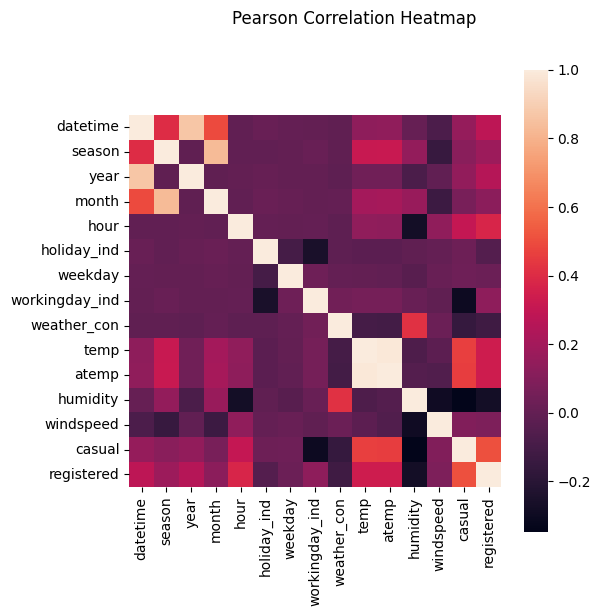

In [21]:
# Check for correlation with the Numeric features
df_bs_nid = df_bs.drop(['id'],axis=1)
pd.set_option('display.precision',2)  # Changed 'precision' to 'display.precision'
plt.figure(figsize=(6, 6))
sns.heatmap(df_bs_nid.drop(['total_count'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

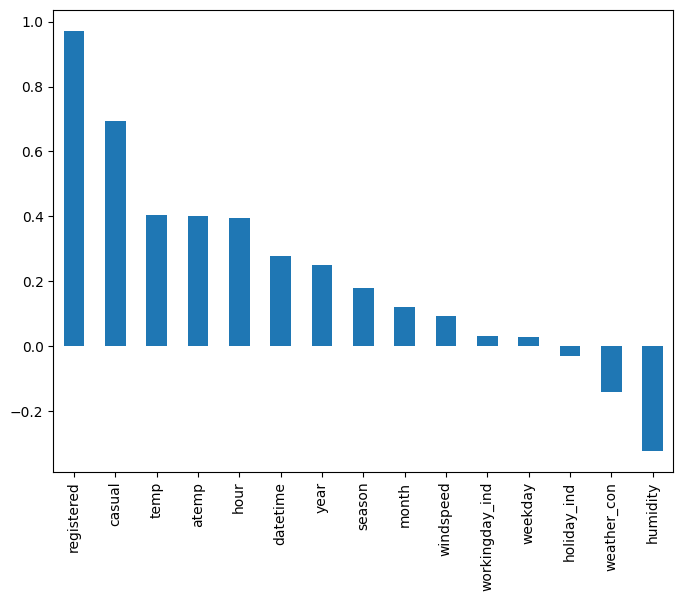

In [22]:
corr_with_tot_count = df_bs_nid.corr()["total_count"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
corr_with_tot_count.drop("total_count").plot.bar()
plt.show()

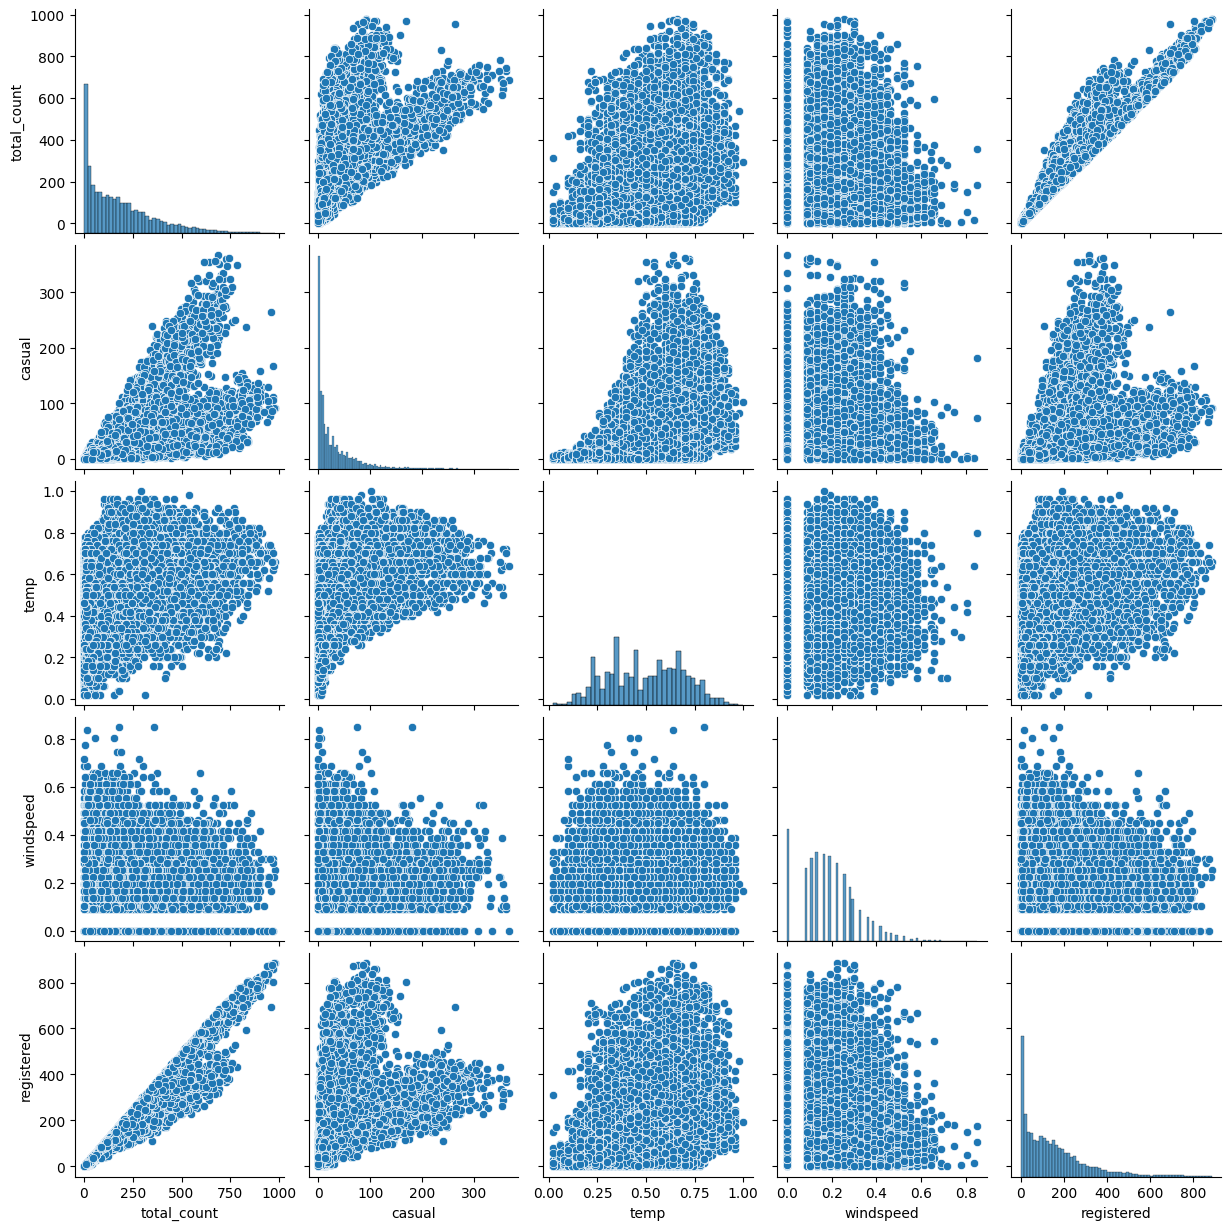

In [23]:
sns.pairplot(df_bs_nid[['total_count', 'casual', 'temp', 'windspeed','registered']])
plt.show()

In [24]:
# Converting the categorical variables using dummy variable encoding
d_season = pd.get_dummies(df_bs['season'], prefix='season')
d_hol_i = pd.get_dummies(df_bs['holiday_ind'], prefix='hol')
d_wkd = pd.get_dummies(df_bs['weekday'], prefix='weekday')
d_w_con = pd.get_dummies(df_bs['weather_con'], prefix='w_con')
d_wd_i = pd.get_dummies(df_bs['workingday_ind'], prefix='wd_i')
d_mon = pd.get_dummies(df_bs['month'], prefix='mon')
d_yr = pd.get_dummies(df_bs['year'], prefix='yr')
d_hr = pd.get_dummies(df_bs['hour'], prefix='hour')

In [25]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['temp','atemp','humidity','windspeed','casual','registered']
df_bs_cont = df_bs[feature_x_cont]

In [26]:
# Creating the final data with all the relevant fields and dep Variable
df_bs_new = pd.concat([d_season,d_hol_i,d_wkd,d_w_con,
                       d_wd_i,d_mon,d_yr,d_hr,
                       df_bs_cont,df_bs['total_count']],axis=1)

In [28]:
df_bs_new.head()

,season_1,season_2,season_3,season_4,hol_0,hol_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed,casual,registered,total_count
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,0.24,0.29,0.81,0.0,3,13,16
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,0.22,0.27,0.80,0.0,8,32,40
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,0.22,0.27,0.80,0.0,5,27,32
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,0.24,0.29,0.75,0.0,3,10,13
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,0.24,0.29,0.75,0.0,0,1,1


<Axes: xlabel='total_count'>

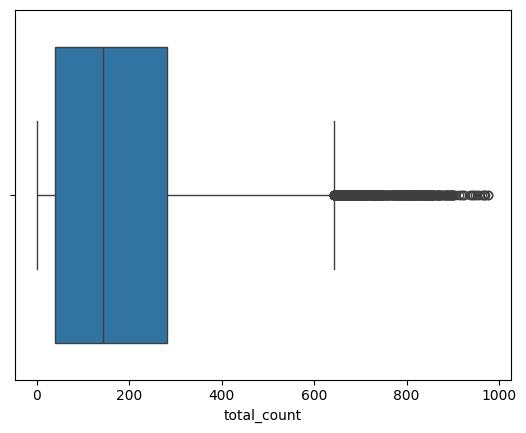

In [29]:
#Discover outlier
sns.boxplot(x=df_bs_new['total_count'])

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
# Define features (X) and target variable (y)
X = df_bs_new.drop(['total_count', 'casual', 'registered'], axis=1)  # Dropping target columns
y = df_bs_new['total_count']  # Target variable

In [34]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
# Optional: Display model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [-5.88560734e+13 -5.97191299e+13 -6.02766648e+13 -5.91628708e+13
  8.79834637e+14  2.71267194e+14 -8.33592689e+14  4.49847936e+14
  4.45563810e+14  4.48143835e+14  4.49470337e+14  4.47858586e+14
 -8.32230423e+14 -1.63641354e+14 -1.51600595e+14 -9.41452501e+13
 -4.13024368e+12  9.55756621e+14 -7.45167143e+14 -4.65295870e+14
 -4.51187734e+14 -4.74674851e+14 -4.65482390e+14 -4.73221356e+14
 -4.65668803e+14 -4.76662896e+14 -4.78638910e+14 -4.65668803e+14
 -4.73403398e+14 -4.68636994e+14 -4.74312083e+14  2.72006590e+14
  2.72006590e+14 -2.28739214e+14 -2.30258569e+14 -2.31390297e+14
 -2.20159917e+14 -2.27591780e+14 -2.30258569e+14 -2.28357497e+14
 -2.26630317e+14 -2.30825260e+14 -2.30636547e+14 -2.30636547e+14
 -2.29690212e+14 -2.31766075e+14 -2.32889068e+14 -2.28548450e+14
 -2.30069302e+14 -2.32515457e+14 -2.31766075e+14 -2.28739214e+14
 -2.30825260e+14 -2.29500387e+14 -2.29879850e+14 -2.31390297e+14
 -2.30447650e+14  2.16250000e+01  2.11250000e+01 -1.56250000e+01
 -3.6

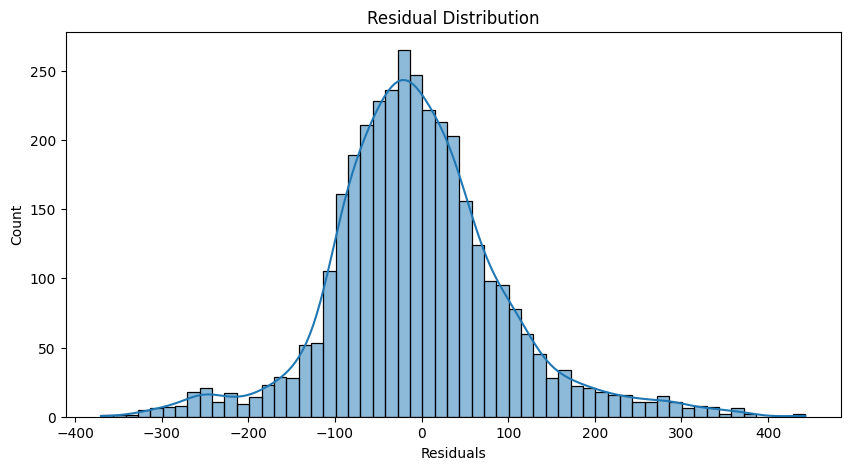

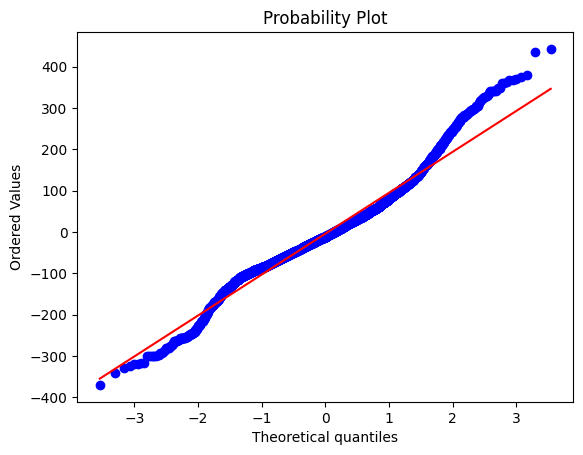

In [48]:
# Residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()